In [1]:
import numpy as np
import pandas as pd
import os, glob
import matplotlib.pyplot as plt

%matplotlib inline

In [11]:
from utils.tracking import extract

wert

<Figure size 720x576 with 0 Axes>

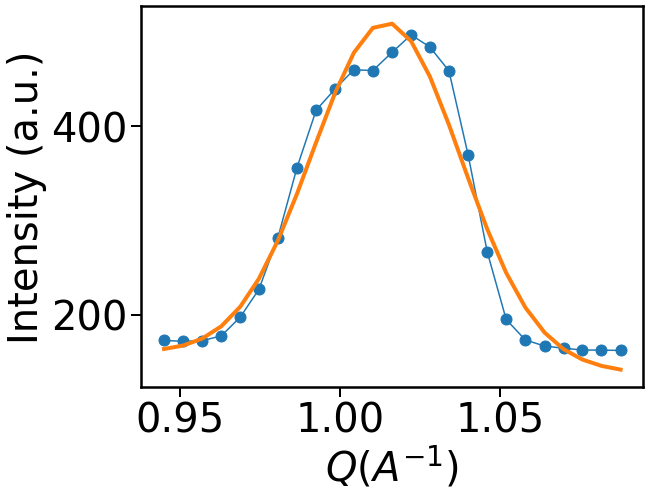

Residual is:  125.4993353974444
Residual is:  131.06550024565388


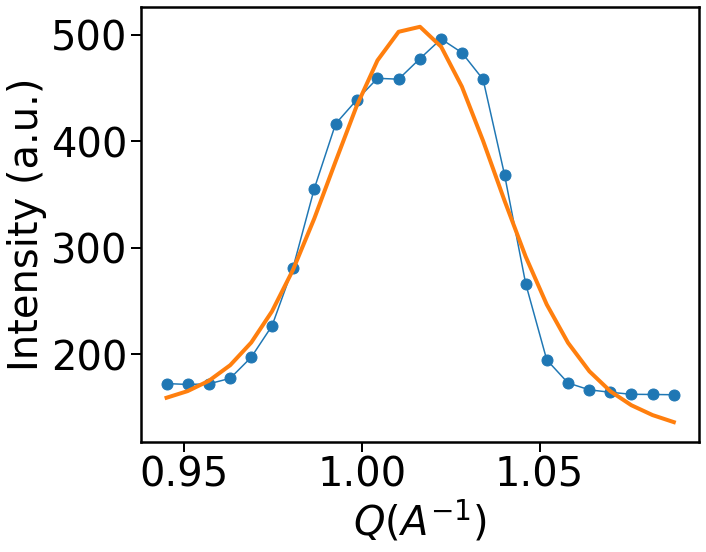

In [20]:
path  = 'C:/Users/Bin'+chr(39)+'s X1/Box/BNL March 2022 Data/AMohite2/maxs/analysis/3D_hum_only_test5/circular_average'

infiles = glob.glob(os.path.join(path, '*_0.0*'+'*.dat'))

data = extract(infiles[0])

from utils.tracking import voigt_fit1,gaus_fit1


# finding the start and end of an array
x1 = np.where(abs(data[:,0]-.95)<= .01)
ind1 = x1[0][0]
x2 = np.where(abs(data[:,0]-1.1)<= .01)
ind2 =x2[0][0]


# plt.plot(data0[ind1:ind2,0],data0[ind1:ind2,1])
plt.figure(figsize = (10,8))
result1 = gaus_fit1(data[ind1:ind2,:],[1, 1, 5000, -5, 100])

plt.figure(figsize = (10,8))
result1 = voigt_fit1(data[ind1:ind2,:],[1, 5000, .01, .01, -1, 100])


In [3]:
path45  = 'C:/Users/Bin'+chr(39)+'s X1/Box/BNL March 2022 Data/AMohite2/maxs/analysis/3D_hum_only_test5/plus_45'
path_45 = 'C:/Users/Bin'+chr(39)+'s X1/Box/BNL March 2022 Data/AMohite2/maxs/analysis/3D_hum_only_test5/minus_45'
path_zero = 'C:/Users/Bin'+chr(39)+'s X1/Box/BNL March 2022 Data/AMohite2/maxs/analysis/3D_hum_only_test5/zero'



infiles1 = glob.glob(os.path.join(path45, '*_0.0*'+'*.dat'))
infiles2 = glob.glob(os.path.join(path_45, '*_0.0*'+'*.dat'))
infiles3 = glob.glob(os.path.join(path_zero, '*_0.0*'+'*.dat'))

print(infiles1)
print(infiles2)
print(infiles3)

["C:/Users/Bin's X1/Box/BNL March 2022 Data/AMohite2/maxs/analysis/3D_hum_only_test5/plus_45\\3D_hum_only_test5_2_0.0s_RH33.926_x-0.000_th0.200_1.00s_451162_maxs.dat"]
["C:/Users/Bin's X1/Box/BNL March 2022 Data/AMohite2/maxs/analysis/3D_hum_only_test5/minus_45\\3D_hum_only_test5_2_0.0s_RH33.926_x-0.000_th0.200_1.00s_451162_maxs.dat"]
["C:/Users/Bin's X1/Box/BNL March 2022 Data/AMohite2/maxs/analysis/3D_hum_only_test5/zero\\3D_hum_only_test5_2_0.0s_RH33.926_x-0.000_th0.200_1.00s_451162_maxs.dat"]


In [4]:
data_plus = extract(infiles1[0])
data_minus = extract(infiles2[0])
data_zero = extract(infiles3[0])

# plt.plot(data[:,0], data[:, 1])


Residual is:  333.325084427529


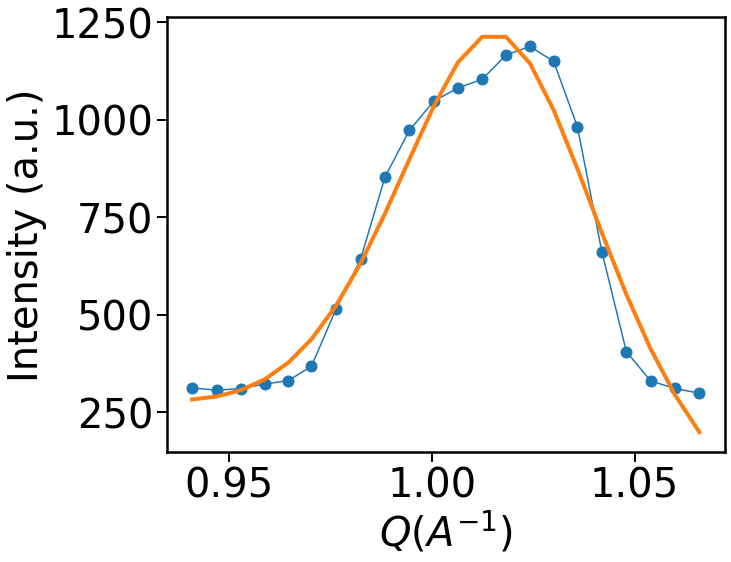

<Figure size 720x576 with 0 Axes>

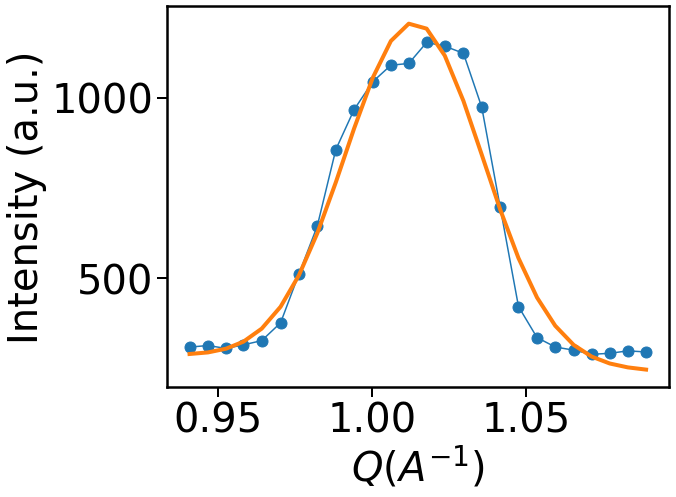

Residual is:  329.4654149280525
Residual is:  374.0200796180118


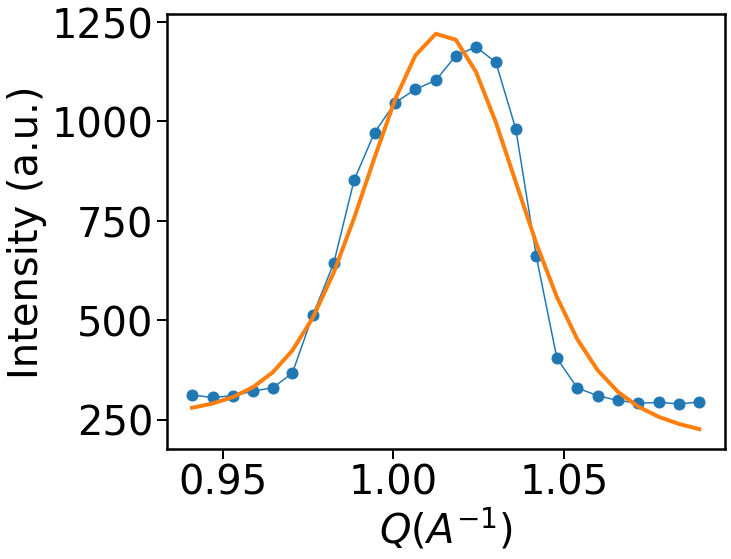

In [10]:
from utils.tracking import pseudo_voigt_fit1,gaus_fit1, voigt_fit1


# finding the start and end of an array
x1 = np.where(abs(data_plus[:,0]-.95)<= .01)
ind1 = x1[0][0]
x2 = np.where(abs(data_plus[:,0]-1.08)<= .01)
ind2 =x2[0][0]


# plt.plot(data0[ind1:ind2,0],data0[ind1:ind2,1])
plt.figure(figsize = (10,8))
result1 = pseudo_voigt_fit1(data_plus[ind1:ind2,:],[1, 2000, .001, .5, -5, 100])


from utils.tracking import pseudo_voigt_fit1,gaus_fit1


# finding the start and end of an array
x1 = np.where(abs(data_minus[:,0]-.95)<= .01)
ind1 = x1[0][0]
x2 = np.where(abs(data_minus[:,0]-1.1)<= .01)
ind2 =x2[0][0]


# plt.plot(data0[ind1:ind2,0],data0[ind1:ind2,1])
plt.figure(figsize = (10,8))
result1 = gaus_fit1(data_minus[ind1:ind2,:],[1, 1, 2000, -5, 100])

plt.figure(figsize = (10,8))
result1 = voigt_fit1(data_plus[ind1:ind2,:],[1, 2000, .01, .01, -1, 100])




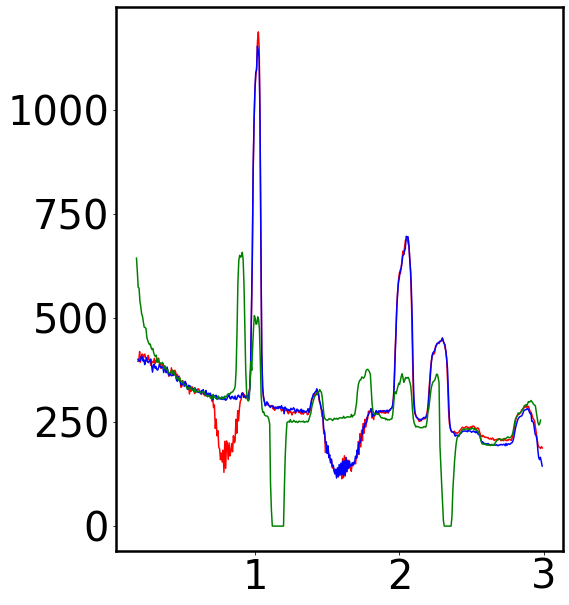

In [22]:
# finding the start and end of an array
x1 = np.where(abs(data_minus[:,0]-.2)<= .01)
ind1 = x1[0][0]
x2 = np.where(abs(data_minus[:,0]-3)<= .01)
ind2 =x2[0][0]

plt.figure(figsize = (8,10))
plt.plot(data_plus[ind1:ind2,0], data_plus[ind1:ind2,1], 'r')
plt.plot(data_minus[ind1:ind2,0], data_minus[ind1:ind2,1], 'b')
plt.plot(data_zero[ind1:ind2,0], data_zero[ind1:ind2,1], 'g')